In [16]:
import pandas as pd
import numpy as np

In [2]:
salaries = "salaries.csv"
teams = "teams.csv"

In [3]:
salaries_df = pd.read_csv(salaries)

In [4]:
teams_df = pd.read_csv(teams)

In [5]:
salaries_df.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [6]:
team_df.head()

NameError: name 'team_df' is not defined

In [7]:
teams_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [10]:
teams_df = teams_df[teams_df.yearID >= 1985]

In [27]:
teams_df = teams_df[teams_df.yearID <= 2016]

In [28]:
teams_df.head()

,yearID,teamID,W
0,1985,ATL,66
1,1985,BAL,83
2,1985,BOS,81
3,1985,CAL,90
4,1985,CHA,85


In [29]:
teams_df = teams_df[['yearID', 'teamID', 'W']]

In [30]:
teams_df.head()

,yearID,teamID,W
0,1985,ATL,66
1,1985,BAL,83
2,1985,BOS,81
3,1985,CAL,90
4,1985,CHA,85


In [31]:
teams_df = teams_df.reset_index(drop=True)

In [32]:
teams_df

,yearID,teamID,W
0,1985,ATL,66
1,1985,BAL,83
2,1985,BOS,81
3,1985,CAL,90
4,1985,CHA,85
...,...,...,...
913,2016,SLN,86
914,2016,TBA,68
915,2016,TEX,95
916,2016,TOR,89


In [33]:
salaries_df.head()

,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178


In [34]:
salaries_df

,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178
...,...,...,...
913,2016,SLN,143053500
914,2016,TBA,57097310
915,2016,TEX,176038723
916,2016,TOR,138701700


In [35]:
salaries_df = salaries_df.groupby(['yearID', 'teamID'], as_index=False).agg({'salary' : 'sum'})

In [36]:
salaries_df.head()

,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178


In [38]:
salaries_df['Wins'] = teams_df['W'].values

In [39]:
salaries_df

,yearID,teamID,salary,Wins
0,1985,ATL,14807000,66
1,1985,BAL,11560712,83
2,1985,BOS,10897560,81
3,1985,CAL,14427894,90
4,1985,CHA,9846178,85
...,...,...,...,...
913,2016,SLN,143053500,86
914,2016,TBA,57097310,68
915,2016,TEX,176038723,95
916,2016,TOR,138701700,89


In [44]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
from scipy import stats

In [41]:
x = salaries_df['Wins']
y = salaries_df['salary']

In [42]:
linregress(x,y)

LinregressResult(slope=930271.113846157, intercept=-14326361.38011086, rvalue=0.25432088540300574, pvalue=5.115291009127439e-15, stderr=116885.35185375591)

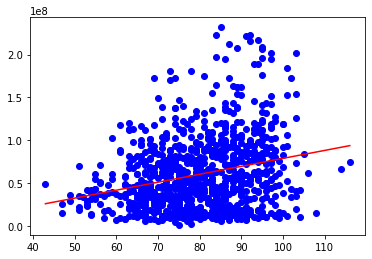

In [45]:
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()